### Data Exploration and Cleaning

In [1]:
!pip install --upgrade seaborn

     |████████████████████████████████| 292 kB 19.1 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [2]:
!pip install --upgrade pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
kyphosis_df = pd.read_csv("datasets/kyphosis.csv")

In [9]:
kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [11]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [13]:
# age in years
kyphosis_df['Age'].mean()/12

6.97119341563786

In [15]:
kyphosis_df['Age'].min()/12

0.08333333333333333

In [14]:
kyphosis_df['Age'].max()/12

17.166666666666668

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [19]:
kyphosis_true = kyphosis_df[kyphosis_df['Kyphosis']==1]
kyphosis_false = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [21]:
print( 'Disease present after operation percentage =', (len(kyphosis_true) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot:>

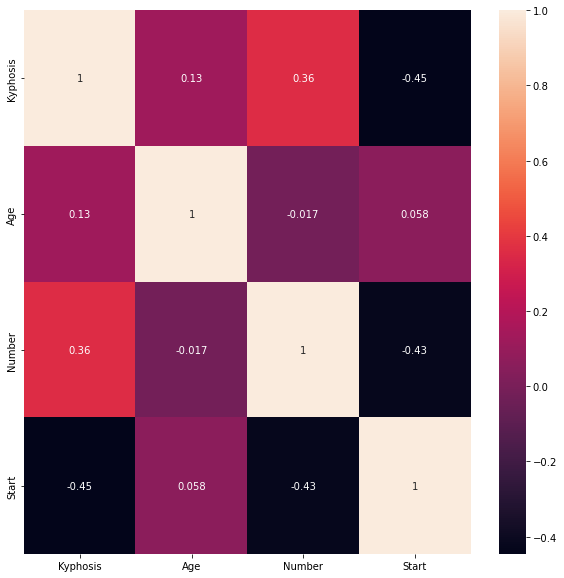

In [22]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(), annot=True) 

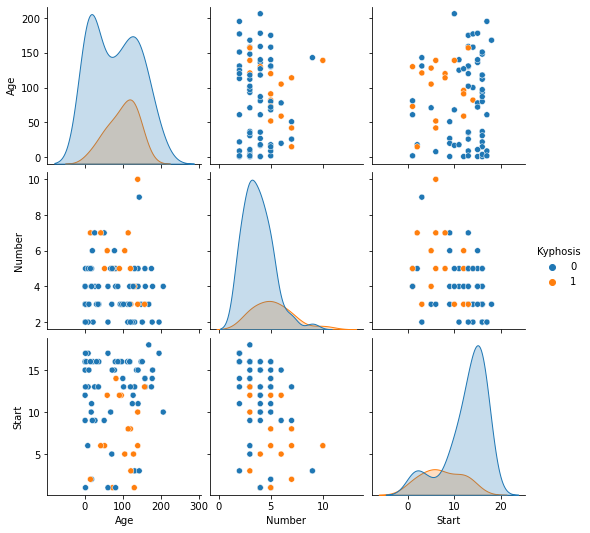

In [23]:
sns.pairplot(kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start']);

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

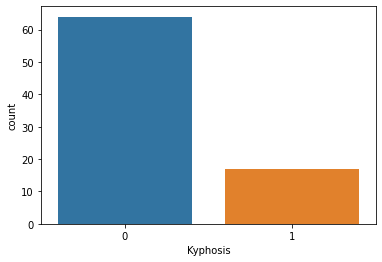

In [24]:
sns.countplot(x = kyphosis_df['Kyphosis'], label = 'Count')

### Training and test datasets

In [29]:
x = kyphosis_df.drop(['Kyphosis'],axis=1)
y = kyphosis_df['Kyphosis']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
x_train.shape

(60, 3)

In [33]:
x_test.shape

(21, 3)

In [34]:
y_train.shape

(60,)

In [35]:
y_test.shape

(21,)

### Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Model metrics

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

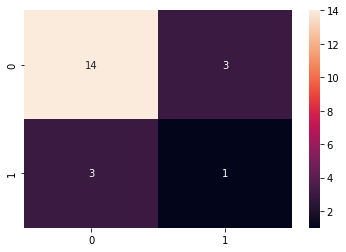

In [38]:
y_predict_test = knn_model.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.25      0.25      0.25         4

    accuracy                           0.71        21
   macro avg       0.54      0.54      0.54        21
weighted avg       0.71      0.71      0.71        21

